<a href="https://colab.research.google.com/github/Skuerjuan/spotify_chona/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Spotify
## Felipe Maierowicz
## 4°D

In [2]:
try:
    import pandas as pd
except ImportError:
    print("Pandas not installed")
    %pip install pandas --user

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib not installed")
    %pip install matplotlib --user

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2025/refs/heads/main/StreamingHistory_Extended.csv"

dataset = pd.read_csv(archivo, low_memory=False)
filtro = dataset["is_podcast"] == False
dataset = dataset[filtro] # Borrando los podcasts
dataset.drop(["user_agent_decrypted", "episode_name", "episode_show_name", "spotify_episode_uri", "skipped", "is_podcast"], axis="columns", inplace=True)
# Borrando las columnas relacionadas a los podcasts y skipped se puede sacar de "reason_end"
dataset.drop("username", axis = "columns", inplace = True) #es siempre el mismo username
dataset['ts'] = pd.to_datetime(dataset['ts']) #typecasting a fecha
dataset.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp
0,2020-12-06 02:51:11+00:00,"iOS 14.2 (iPhone12,3)",145610,AR,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,trackdone,fwdbtn,True,False,1607222710755
1,2020-12-06 02:53:31+00:00,"iOS 14.2 (iPhone12,3)",138692,AR,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,fwdbtn,fwdbtn,True,False,1607223071185
2,2020-12-06 02:53:53+00:00,"iOS 14.2 (iPhone12,3)",22662,AR,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,fwdbtn,fwdbtn,True,False,1607223210387
3,2020-12-06 02:53:56+00:00,"iOS 14.2 (iPhone12,3)",2716,AR,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,fwdbtn,fwdbtn,True,False,1607223233165
4,2020-12-06 02:53:57+00:00,"iOS 14.2 (iPhone12,3)",116,AR,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,fwdbtn,fwdbtn,True,False,1607223236453


In [5]:
'''
---Análisis de las Columnas:
-shuffle, reason_start, reason_end y offline dependen del
comportamiento del usuario (ms_played depende de la duración de la canción
y de si skippeó o la escuchó entera, que se puede sacar de reason_end)
-columnas de master + spotify_track_uri dependen de la canción y el autor
-ts, offline_timestamp dependen de la fecha y hora de la escucha
-platform y conn_country dependen
del usuario y el dispositivo
'''
dataset.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'reason_start',
       'reason_end', 'shuffle', 'offline', 'offline_timestamp'],
      dtype='object')

In [119]:
# Primer y última fecha
print(dataset['ts'].min(), " - ", dataset['ts'].max())
n_dias = (dataset['ts'].max() - dataset['ts'].min()).days #num total de dias en el dataset

2014-06-27 18:01:15+00:00  -  2024-05-23 23:56:20+00:00


In [7]:
# Cantidad de canciones

songs = dataset["spotify_track_uri"]
songs = songs.unique() #contar sin repetidos
len(songs)

11557

In [8]:
# Duración reproducciones

time_spent_song = dataset.groupby('spotify_track_uri')['ms_played'].sum().reset_index() #ordenando por uri única y creando un index
track_names = dataset[['master_metadata_track_name', "master_metadata_album_artist_name", "spotify_track_uri"]].drop_duplicates()

time_spent_song = time_spent_song.merge(track_names, on="spotify_track_uri")
#mergeando con nombres y artistas para tener datos completos
time_spent_song = time_spent_song.sort_values(by="ms_played", ascending=False) #ordenando
time_spent_song.head()

,spotify_track_uri,ms_played,master_metadata_track_name,master_metadata_album_artist_name
1411,spotify:track:0wXuerDYiBnERgIpbb3JBR,56637046,Redbone,Childish Gambino
7067,spotify:track:4lmhVHC5sU5PLqpPDlcdLV,50999244,Rain,Vinnie Moore
8044,spotify:track:5RrJCusmR1J54b5ivqdWIu,46220252,Spain,Chick Corea
2028,spotify:track:1NeLwFETswx8Fzxl2AFl91,45732605,Something About Us,Daft Punk
9062,spotify:track:69kOkLUCkxIZYexIgSG8rq,45517878,Get Lucky (feat. Pharrell Williams and Nile Ro...,Daft Punk


In [9]:
# Duración por artista
#similar al punto anterior
time_spent_artist = dataset.groupby("master_metadata_album_artist_name")['ms_played'].sum()
time_spent_artist = time_spent_artist.sort_values(ascending=False)
time_spent_artist.head()

,ms_played
master_metadata_album_artist_name,
Charly García,295324381
Luis Alberto Spinetta,276254779
Childish Gambino,259892455
Serú Girán,243400227
Daft Punk,228993913


In [10]:
# canción más escuchada
most_listened_song = time_spent_song.iloc[0]
most_listened_song

,1411
spotify_track_uri,spotify:track:0wXuerDYiBnERgIpbb3JBR
ms_played,56637046
master_metadata_track_name,Redbone
master_metadata_album_artist_name,Childish Gambino


In [11]:
# artista más escuchado
most_listened_artist = time_spent_artist.idxmax()
most_listened_artist

'Charly García'

In [12]:
# canción más escuchada de charly

tspent_song_charly = time_spent_song[time_spent_song["master_metadata_album_artist_name"] == most_listened_artist] #filtrando por charly
tspent_song_charly = tspent_song_charly.sort_values(by="ms_played", ascending=False) #ordenando
tspent_song_charly.iloc[0]

,5525
spotify_track_uri,spotify:track:3k9dGCm2R2Y70e87aMHYC3
ms_played,31405810
master_metadata_track_name,Hablando a Tu Corazón
master_metadata_album_artist_name,Charly García


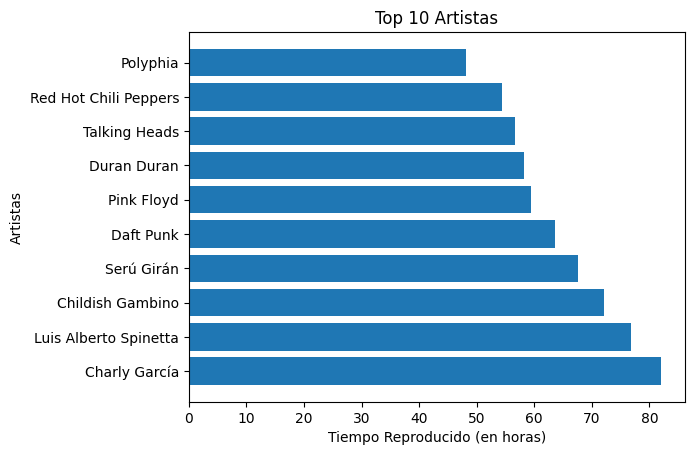

In [86]:
#top 10 artistas


topten_artist = time_spent_artist.head(10)
time_topten_artist = topten_artist.values / (1000*60*60) #pasando a horas
topten_artist = topten_artist.index.tolist() #conseguida lista de top 10 artistas
fig, ax = plt.subplots()
ax.barh(topten_artist, time_topten_artist)
ax.set_xlabel("Tiempo Reproducido (en horas)")
ax.set_ylabel("Artistas")
ax.set_title("Top 10 Artistas")
plt.show()

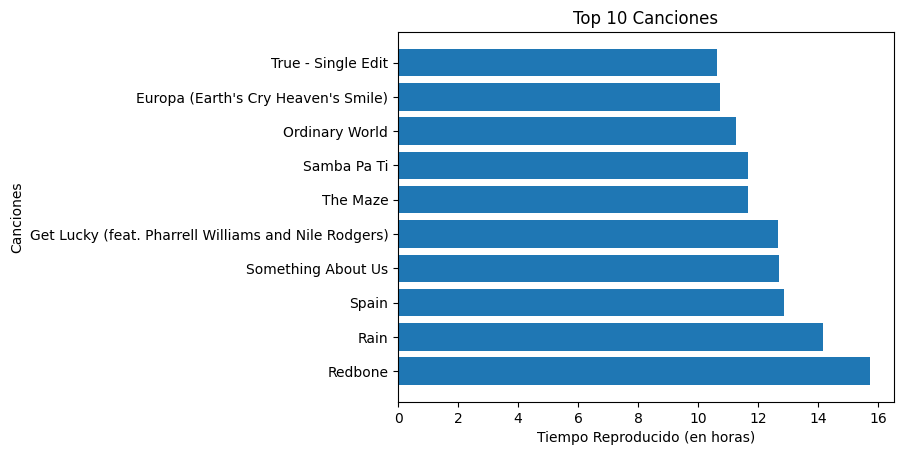

In [87]:
#top 10 canciones

topten_song = time_spent_song.head(10)
topten_song_name = topten_song["master_metadata_track_name"]
topten_song_time = topten_song["ms_played"]/(1000*60*60) #pasando a horas
fig, ax = plt.subplots()
ax.barh(topten_song_name, topten_song_time)
ax.set_xlabel("Tiempo Reproducido (en horas)")
ax.set_ylabel("Canciones")
ax.set_title("Top 10 Canciones")
plt.show()

In [19]:
#Investigando reason_end

dataset["reason_end"].unique()

array(['fwdbtn', 'backbtn', 'trackdone', 'endplay', 'remote',
       'unexpected-exit-while-paused', 'logout', 'unexpected-exit',
       'unknown', 'trackerror', nan], dtype=object)

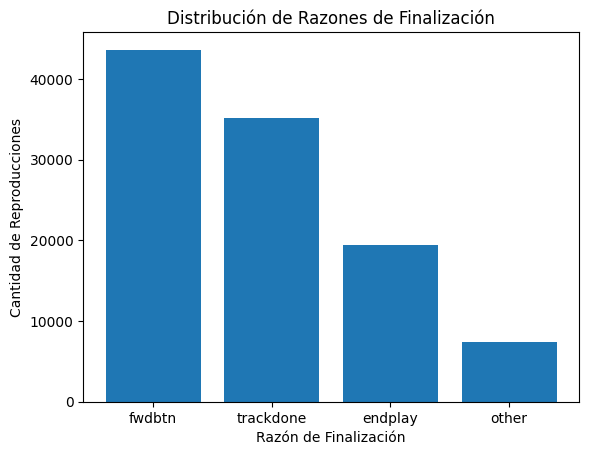

In [117]:
# graficando los números de cada acción

count_end = dataset["reason_end"].value_counts()
unwanted = ["unexpected-exit-while-paused", "logout", "remote", "unknown", "unexpected-exit", "trackerror", "backbtn"]
#razones que no nos interesan
n_other = count_end[count_end.index.isin(unwanted)].sum() #las agrupamos en "other"
count_end["other"] = n_other
count_end = count_end.drop(unwanted) #hacemos una nueva categoría y eliminamos el resto
count_end = count_end.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(count_end.index, count_end)
ax.set_xlabel("Razón de Finalización")
ax.set_ylabel("Cantidad de Reproducciones")
ax.set_title("Distribución de Razones de Finalización")
plt.show()


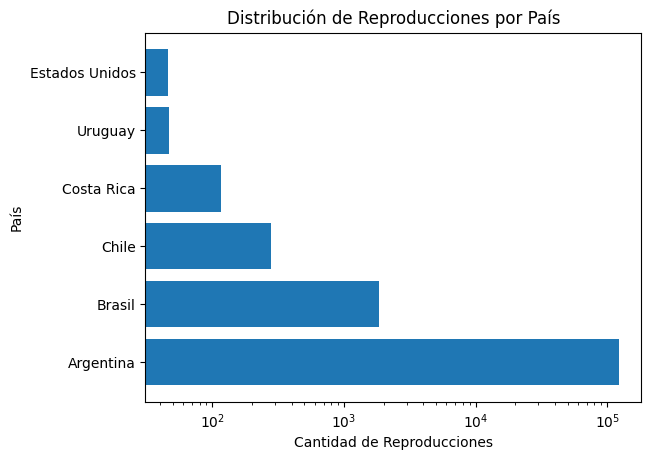

In [49]:
#Países desde los que se escucha

n_countries = dataset['conn_country'].value_counts()
n_countries.drop("ZZ", inplace=True) #ZZ = unknown
countries = ["Argentina", "Brasil", "Chile", "Costa Rica", "Uruguay", "Estados Unidos"]
#Nombres custom para el gráfico

fig, ax = plt.subplots()
ax.barh(countries, n_countries)
ax.set_xscale("log") #AR es muchísimo más grande que el resto de valores
ax.set_ylabel("País")
ax.set_xlabel("Cantidad de Reproducciones")
ax.set_title("Distribución de Reproducciones por País")
plt.show()

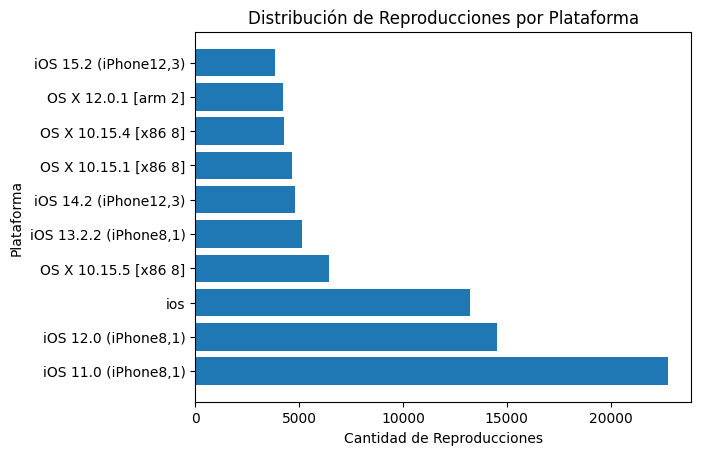

In [63]:
#Analizando la info que tenemos sobre plataformas

plat = dataset["platform"].value_counts()
plat = plat.head(10)

fig, ax = plt.subplots()
ax.barh(plat.index, plat)
ax.set_ylabel("Plataforma")
ax.set_xlabel("Cantidad de Reproducciones")
ax.set_title("Distribución de Reproducciones por Plataforma")
plt.show()

#Podemos ver que separa los distintos OSs que tienen su celular y su computadora

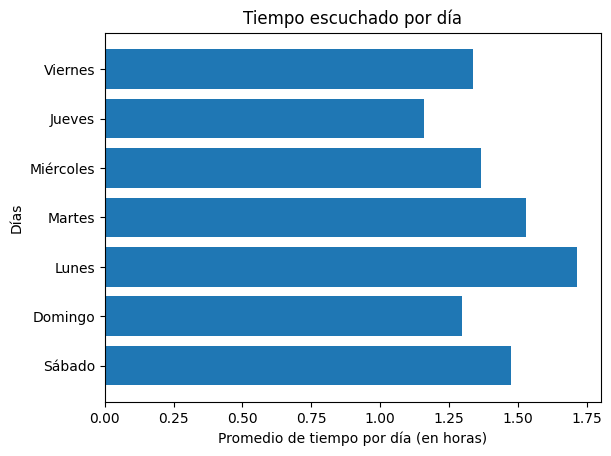

In [129]:
#Días de la semana

dias = dataset[["ts", "ms_played"]].copy()

dias["ms_played"] = dias["ms_played"] / (1000 * 60 * 60) #pasando de ms a hora
dias["dia"] = dias["ts"].dt.day_name()
dias["fecha"] = dias["ts"].dt.date
dias = dias.groupby(["fecha", "dia"])["ms_played"].sum().reset_index()
promedios = dias.groupby("dia")["ms_played"].mean()
#con esto contamos la cantidad de cada día y lo utilizamos para sacar el promedio
orden = ["Sábado", "Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
#nombres custom para el graf

fig, ax = plt.subplots()
ax.barh(orden, promedios.values)
ax.set_title("Tiempo escuchado por día")
ax.set_xlabel("Promedio de tiempo por día (en horas)")
ax.set_ylabel("Días")
plt.show()

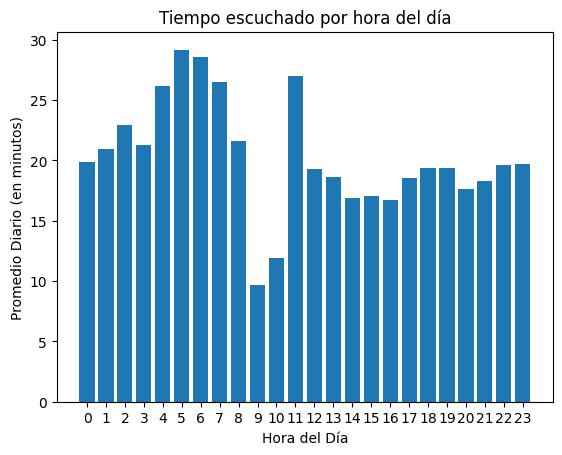

In [131]:
#Escucha por hora

horas = dataset[["ts", "ms_played"]].copy()
horas["ms_played"] = horas["ms_played"] / (1000 * 60)
horas["hora"] = horas["ts"].dt.hour
horas["fecha"] = horas["ts"].dt.date
horas = horas.groupby(["fecha", "hora"])["ms_played"].sum().reset_index()
promedios = horas.groupby("hora")["ms_played"].mean()

fig, ax = plt.subplots()
ax.bar(promedios.index, promedios.values)
ax.set_title("Tiempo escuchado por hora del día")
ax.set_xlabel("Hora del Día")
ax.set_ylabel("Promedio Diario (en minutos)")
ax.set_xticks(range(0, 24)) # ajustando referencia para coindicir con los datos
plt.show()

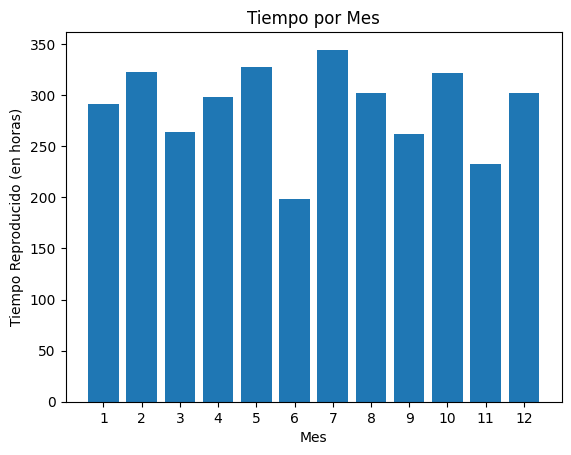

In [132]:
#Escucha por mes

meses = dataset[["ts", "ms_played"]].copy()
meses["ms_played"] = meses["ms_played"] / (1000 * 60 * 60)
meses["ts"] = dataset["ts"].dt.month
meses = meses.groupby("ts").sum()
fig, ax = plt.subplots()
ax.bar(meses.index, meses["ms_played"])
ax.set_xticks(range(1, 13))
ax.set_xlabel("Mes")
ax.set_ylabel("Tiempo Reproducido (en horas)")
ax.set_title("Tiempo por Mes")
plt.show()

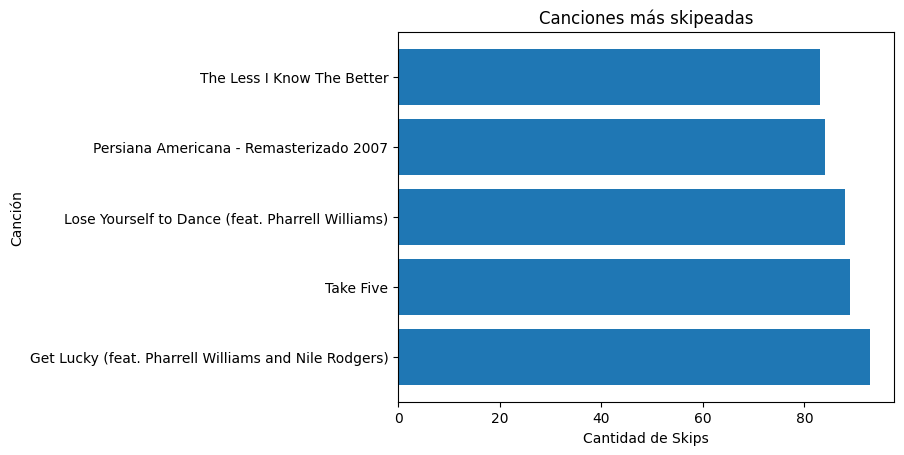

In [164]:
#Canción más veces salteada

canciones_skip = dataset[dataset["reason_end"] == "fwdbtn"].copy()
canciones_skip = canciones_skip[["master_metadata_track_name", "master_metadata_album_artist_name", "spotify_track_uri"]]

conteo_skips = canciones_skip.groupby(
    ["spotify_track_uri", "master_metadata_track_name", "master_metadata_album_artist_name"]
).size().reset_index(name="skips")

conteo_skips = conteo_skips.sort_values(by="skips", ascending=False)
conteo_skips

fig, ax = plt.subplots()
ax.barh(conteo_skips["master_metadata_track_name"].head(5), conteo_skips["skips"].head(5))
ax.set_title("Canciones más skipeadas")
ax.set_xlabel("Cantidad de Skips")
ax.set_ylabel("Canción")
plt.show()